<a href="https://colab.research.google.com/github/shauryajaggi/LinearRegressionGoldPrice/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sklearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib
import matplotlib.pyplot as mp
import plotly.express as px

In [ ]:
gdata=pd.read_csv("goldann.csv")

In [ ]:
gdata.describe()

,Price
count,70.000000
mean,412.776457
std,444.932209
min,34.660000
25%,35.277500
50%,320.803500
75%,458.943500
max,1687.342000


In [ ]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    70 non-null     object 
 1   Price   70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
gdata

,Date,Price
0,1950-12,34.720
1,1951-12,34.660
2,1952-12,34.790
3,1953-12,34.850
4,1954-12,35.040
...,...,...
65,2015-12,1068.317
66,2016-12,1152.165
67,2017-12,1265.674
68,2018-12,1249.887


In [ ]:
gdata['Date'] = gdata['Date'].apply(lambda x: int(x.replace("-12","")))

In [ ]:
gdata

,Date,Price
0,1950,34.720
1,1951,34.660
2,1952,34.790
3,1953,34.850
4,1954,35.040
...,...,...
65,2015,1068.317
66,2016,1152.165
67,2017,1265.674
68,2018,1249.887


In [ ]:
his=px.scatter(gdata,x="Date",y="Price",title="Year vs Price of Gold comparision")
his.show()

In [ ]:
gdata.corr()

,Date,Price
Date,1.000000,0.834937
Price,0.834937,1.000000


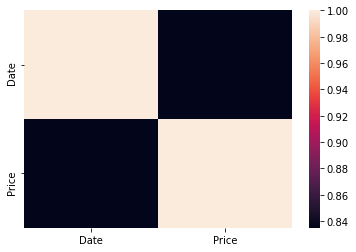

In [ ]:
sns.heatmap(gdata.corr())

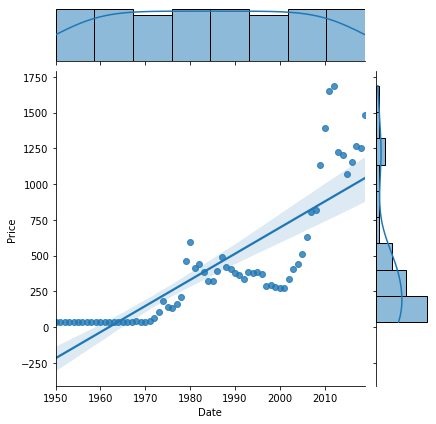

In [ ]:
sns.jointplot(x="Date",y="Price",data=gdata,kind='reg')

In [ ]:
X=np.array(gdata["Date"])
#or you could write np.array(gdata.drop(["Price"],1)) if there were more than 1 independent parameters.
Y=np.array(gdata["Price"])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(X,Y,test_size=0.1)
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
accuracy = linear.score(x_test.reshape(-1,1),y_test.reshape(-1,1))
print(accuracy)

0.6210381383829972


To get the equation of the line y=mx+b,


In [ ]:
print("Coefficient: ", linear.coef_)
print("Intercept: ", linear.intercept_)

Coefficient:  [[17.32004639]]
Intercept:  [-33964.03342945]


You can now tell y=17.32x-33964.033 is the line



In [ ]:
prediction = linear.predict(x_test.reshape(-1,1))
for i in range(len(prediction)):
  print(prediction[i],x_test[i],y_test[i])

[987.82017618] 2018 1249.887
[260.378228] 1976 133.674
[139.1379033] 1969 35.189
[866.57985149] 2011 1652.725
[450.89873824] 1987 487.079
[676.05934125] 2000 271.892
[295.01832077] 1978 207.895


In [ ]:
#saving this bad accuracy model,
import pickle
with open("badaccgoldpricemodel.pickle","wb") as f:
  pickle.dump(linear,f)
pickle_in=open("badaccgoldpricemodel.pickle","rb")
linear=pickle.load(pickle_in)